**Project: Breastcancer detection  using Machine Learning and Deep learning through binary classification**

**Business Understanding:**

**It is no secret that it's always better to find detect  cancer early, when it is easier to treat and before it is big enough to feel or cause symptoms . Early breast cancer detection is crucial to save precious lives.** 

**We will build a Machine Learning model and take into use parameters such as  radius_mean,texture_mean, perimeter_mean,area_mean etc. The machine learning system would be  taking real-valued features are computed for each cell nucleus and based on that it predicts whether the patient diagnosis is Malignant(M) or Benign(M).**

**Objective:Build a breat cancer detection system using Machine Learning and Deep Learning  real-valued features for each cell nucleus.**


This database is also available through the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Importing the relevant libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



**Loading of the data**

In [53]:
c_data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

**PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

In [54]:
c_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [55]:
c_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [56]:
c_data =c_data.drop(columns=['id','Unnamed: 32']) 

In [57]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [58]:
c_data. describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
c_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**DATA VISUALISATION**

<Axes: xlabel='diagnosis', ylabel='count'>

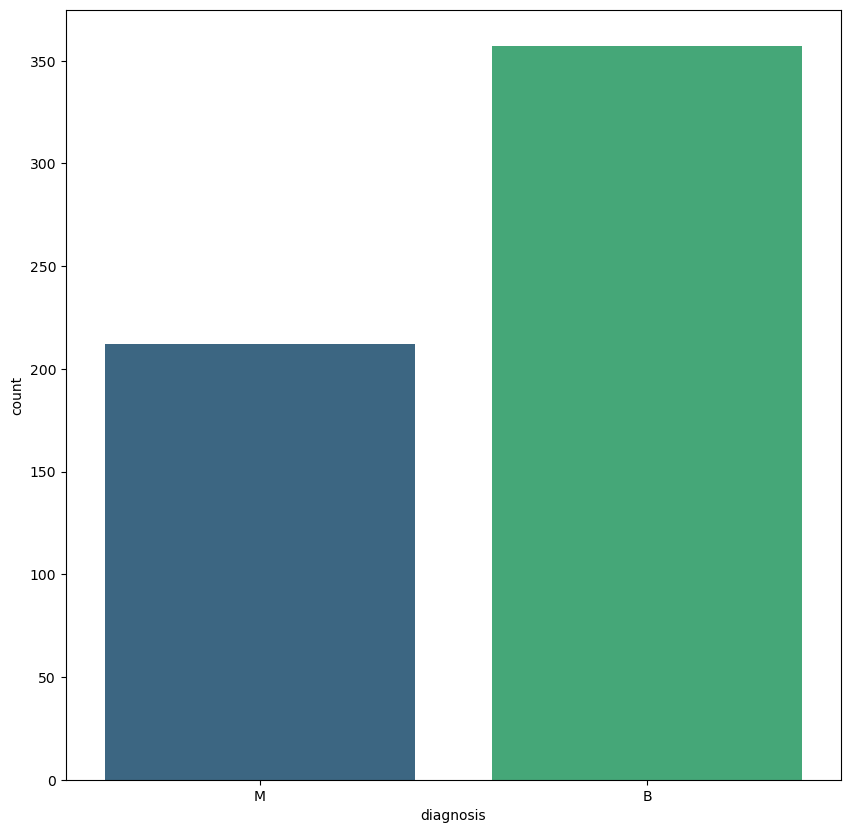

In [60]:
plt.figure(figsize=(10, 10))
sns.countplot(x=c_data['diagnosis'], palette="viridis") 

In [61]:
benign, malignant=c_data['diagnosis'].value_counts()
print("No. Benign:",benign) 
print("No. Malignant:", malignant) 



No. Benign: 357
No. Malignant: 212


**From above we can see that the diagnosis are dominated by Benign**

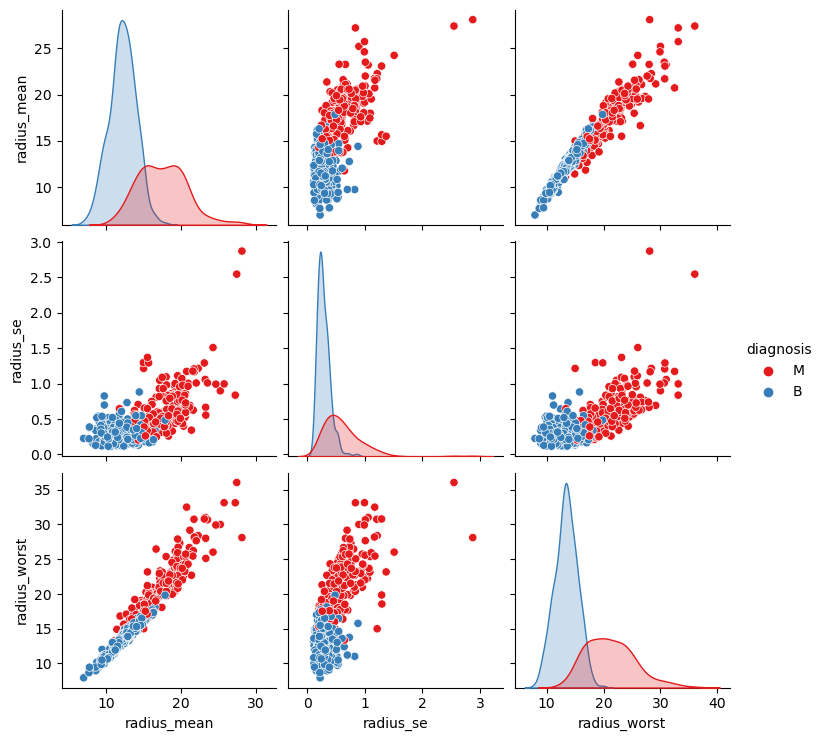

In [62]:
radi_cols=['diagnosis', 'radius_mean', 'radius_se', 'radius_worst']
sns.pairplot(data=c_data[radi_cols], hue="diagnosis", palette="Set1") 

Above we depict the relationship between the radius features through an interaction with our target variable i.e the diagnosis

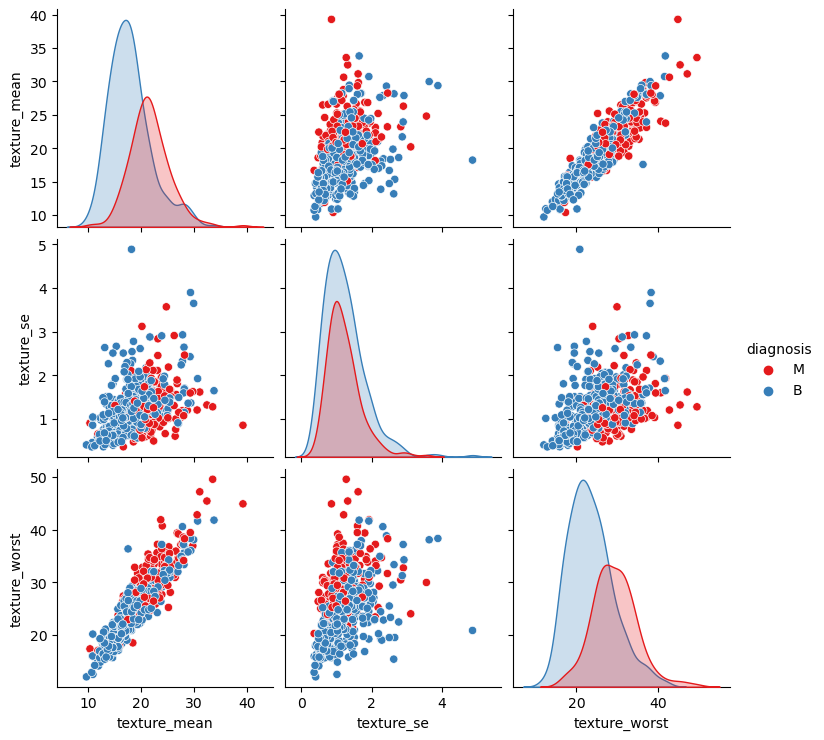

In [63]:
smooth_cols=['diagnosis', 'texture_mean','texture_se', 'texture_worst'] 
sns.pairplot(data=c_data[smooth_cols],hue="diagnosis", palette="Set1") 

Above we depict the relationship between the texture features through an interaction with our target variable i.e the diagnosis

PLOTTING OF THE HEATMAP

<Axes: >

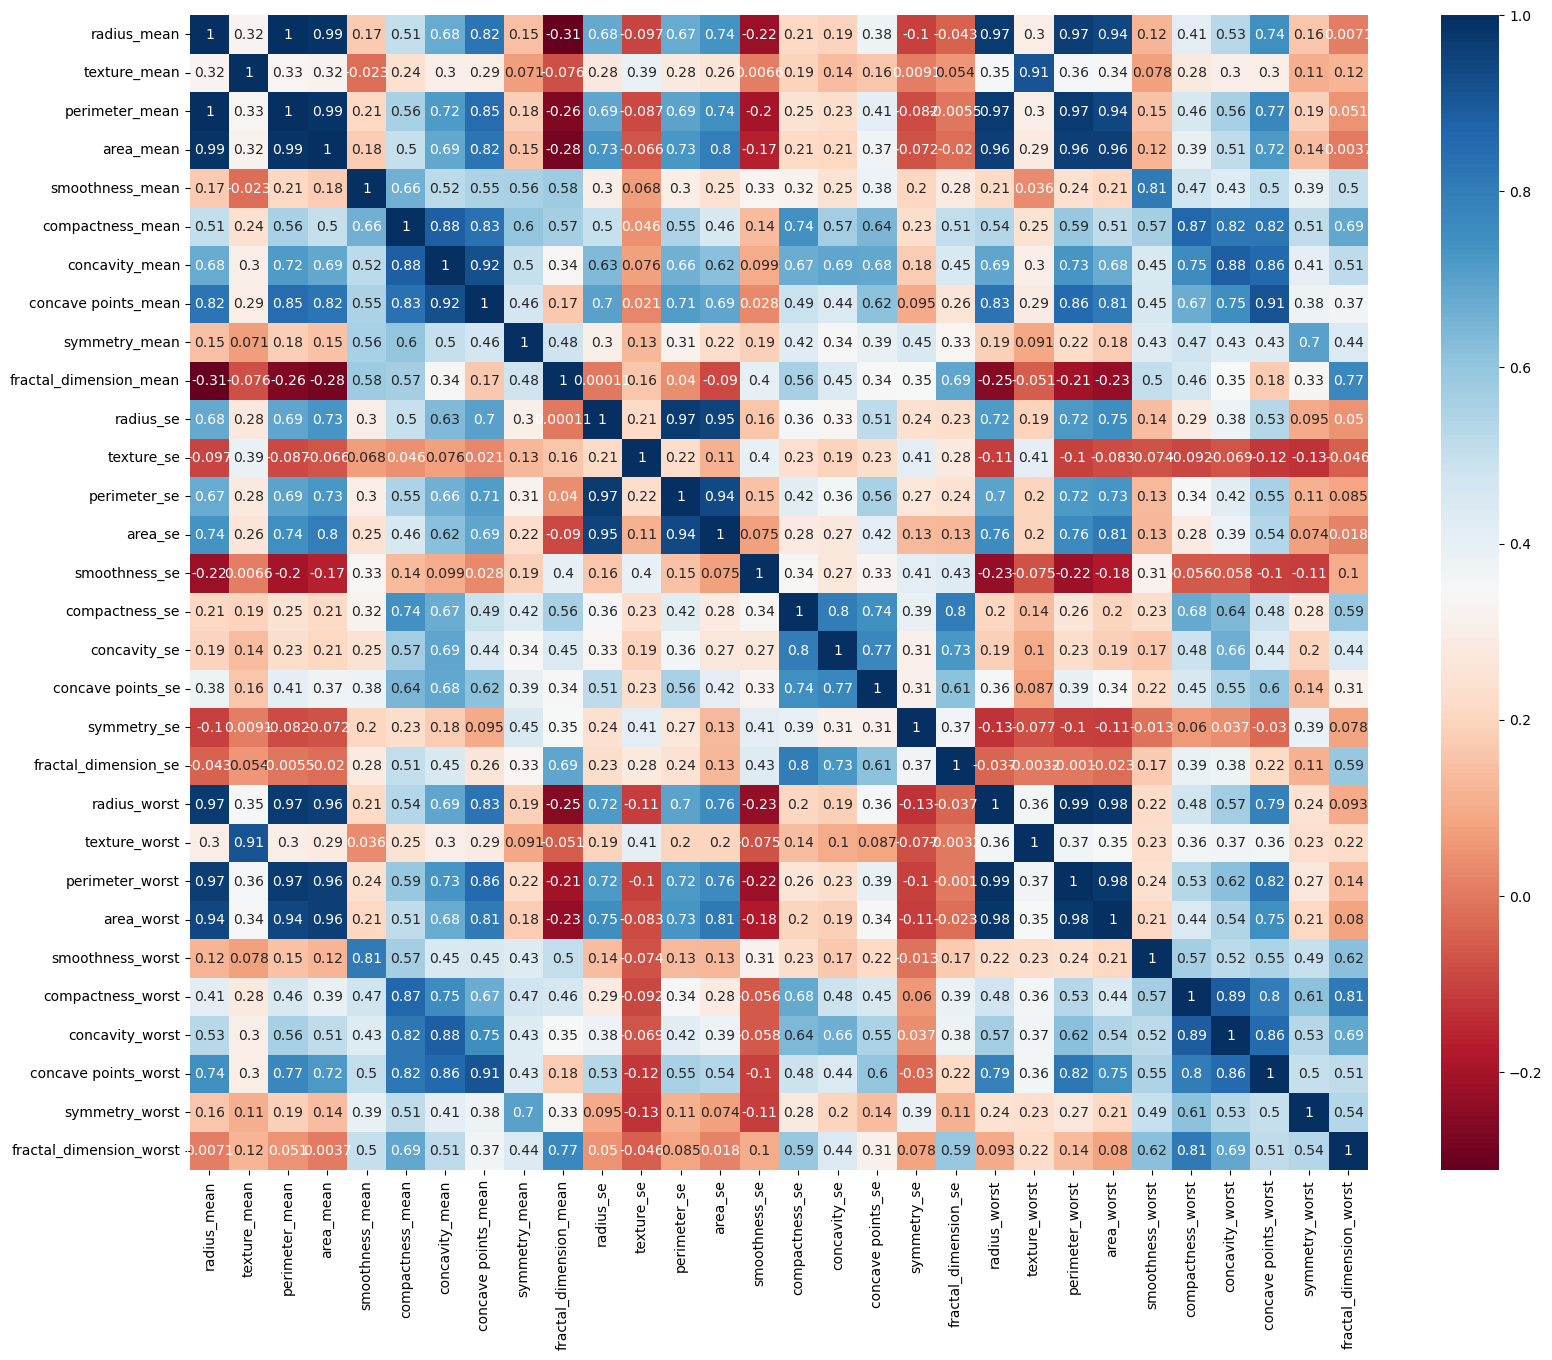

In [64]:
plt.figure(figsize=(19,15))
sns.heatmap(c_data.corr(), cmap="RdBu" ,annot=True) 

FINAL DATA PREPERATION BEFORE APPLYING MACHINE LEARNING AND DEEP LEARNING

Label encoding our target variable

In [65]:
encoder=LabelEncoder() 
c_data['diagnosis'] =encoder.fit_transform(c_data['diagnosis'])
c_data['diagnosis'].unique() 

array([1, 0])

In [66]:
X=c_data.drop("diagnosis", axis=1) 
y=c_data["diagnosis"] 


In [67]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [68]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

scaling our data

In [69]:
Scaler=StandardScaler() 
X =Scaler.fit_transform(X) 

**Splitting our data into training and test sets**

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (426, 30) (143, 30)


In [72]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras import layers,callbacks

**PREDICTION USING NUERAL NETWORKS(DEEP LEARNING)**

**The model 1**

In [73]:
model=keras.Sequential([
    layers.Flatten(input_shape=[30]),
    layers.Dense(40,activation='relu'),
    layers.Dense(25,activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(1, activation='sigmoid')
]) 

In [74]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [75]:
history=model.fit(
X_train,y_train,
    validation_data=(X_test,y_test),
epochs=67)

Epoch 1/67
14/14 [==============================] - 1s 21ms/step - loss: 0.5888 - accuracy: 0.6925 - val_loss: 0.4510 - val_accuracy: 0.9441
Epoch 2/67
14/14 [==============================] - 0s 7ms/step - loss: 0.3800 - accuracy: 0.9272 - val_loss: 0.2765 - val_accuracy: 0.9650
Epoch 3/67
14/14 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.9437 - val_loss: 0.1663 - val_accuracy: 0.9720
Epoch 4/67
14/14 [==============================] - 0s 5ms/step - loss: 0.1647 - accuracy: 0.9577 - val_loss: 0.1117 - val_accuracy: 0.9790
Epoch 5/67
14/14 [==============================] - 0s 6ms/step - loss: 0.1200 - accuracy: 0.9765 - val_loss: 0.0872 - val_accuracy: 0.9790
Epoch 6/67
14/14 [==============================] - 0s 6ms/step - loss: 0.0952 - accuracy: 0.9789 - val_loss: 0.0759 - val_accuracy: 0.9720
Epoch 7/67
14/14 [==============================] - 0s 6ms/step - loss: 0.0795 - accuracy: 0.9789 - val_loss: 0.0726 - val_accuracy: 0.9720
Epoch 8/67
14/14 [=

**VISUALIZATION**

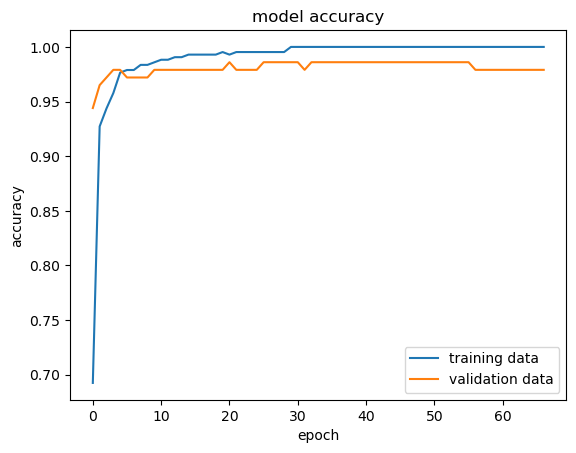

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

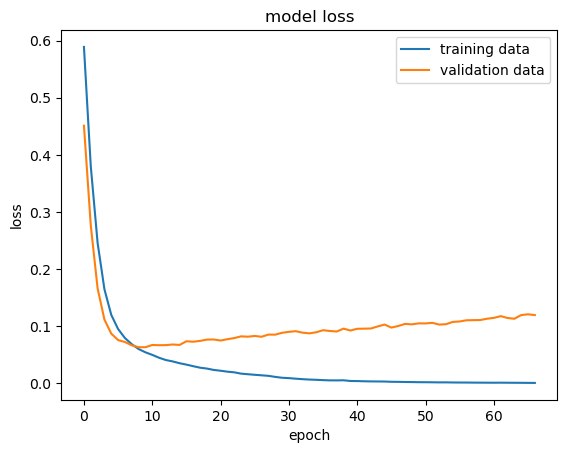

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data','validation data'], loc='upper right')
         

In [78]:
loss,accuracy=model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.9790


In [79]:
print(X_test.shape)
print(X_test[0])

(143, 30)
[-0.47069438 -0.16048584 -0.44810956 -0.49199876  0.23411429  0.02765051
 -0.10984741 -0.27623152  0.41394897  0.13217601 -0.03274296 -0.31361556
 -0.18269561 -0.22105292 -0.02932749 -0.35591235 -0.16192949 -0.23133322
 -0.32961186 -0.07901817 -0.26903951 -0.16890536 -0.33393537 -0.35629925
  0.4485028  -0.10474068 -0.02441212 -0.19956318  0.18320441  0.19695794]


In [80]:
y_pred=model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [81]:
print(y_pred.shape)
print(y_pred[0])


(143, 1)
[0.00988315]


**PREDICTION USING MACHINE LEARNING**

**The model 2**

In [82]:
#svm classifier 
clf=svm.SVC()  
clf.fit(X_train, y_train),
clfy_pred=clf.predict(X_test)

accuracy=accuracy_score(clfy_pred,y_test)
print(accuracy)

0.972027972027972


In [83]:
#cross validation for the svm calssifier
score=cross_val_score(clf,X,y, scoring='accuracy',cv=5)
score.mean()

0.9736376339077782

 **Hyperparameter tuning**

In [86]:

clf2 = svm.SVC()


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.1, 1]
}


grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9790209790209791


In [87]:

score=cross_val_score(clf2,X,y, scoring='accuracy',cv=5)
score.mean()

0.9736376339077782

**Both the Neural Network and the svm classifiers have a remarkable accuracy of 97%. Deploying  the Neural Network for breast cancer prediction  is recommendable as it is more likely to  perform better on larger volumes of data and complex relations in data.**

In [90]:
tf.keras.models.save_model(model,'my_bcdetection_model.hdf5')